In [1]:
# installing yfinance library
!pip install yfinance

# importing necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np

# Download historical data for required stocks
tickers = ['AMZN','GOOG','MSFT']
ohlcv_data = {}

#looping over tickers and storing the dataframe in dictionary
for ticker in tickers:
  temp = yf.download(ticker, period='7mo', interval='1d')
  temp.dropna(how='any', inplace=True)
  ohlcv_data[ticker] = temp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
# Checking for one ticker 
df = ohlcv_data['AMZN'].copy()
df['return'] = df['Adj Close'].pct_change()
df['cum_return'] = (1+df['return']).cumprod()
df

,Open,High,Low,Close,Adj Close,Volume,return,cum_return
Date,,,,,,,,
2022-02-22,150.478500,152.982498,148.485504,150.197495,150.197495,66128000,NaN,NaN
2022-02-23,151.650497,151.763000,144.651001,144.826996,144.826996,64244000,-0.035756,0.964244
2022-02-24,139.837494,151.748993,139.500000,151.358002,151.358002,100786000,0.045095,1.007727
2022-02-25,150.550003,153.990005,149.213501,153.788498,153.788498,62396000,0.016058,1.023909
2022-02-28,152.425003,154.449997,150.850006,153.563004,153.563004,57684000,-0.001466,1.022407
...,...,...,...,...,...,...,...,...
2022-09-13,131.009995,131.399994,126.269997,126.820000,126.820000,72694000,-0.070575,0.844355
2022-09-14,127.360001,128.839996,126.330002,128.550003,128.550003,45316800,0.013641,0.855873
2022-09-15,127.379997,130.369995,125.500000,126.279999,126.279999,52887200,-0.017659,0.840760


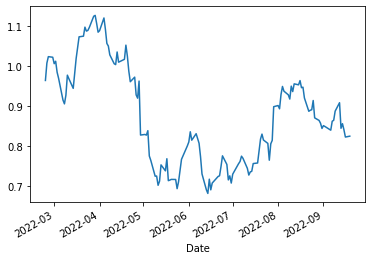

In [3]:
df['cum_return'].plot()

In [6]:
df['cum_roll_max'] = df['cum_return'].cummax()
df

,Open,High,Low,Close,Adj Close,Volume,return,cum_return,cum_roll_max
Date,,,,,,,,,
2022-02-22,150.478500,152.982498,148.485504,150.197495,150.197495,66128000,NaN,NaN,NaN
2022-02-23,151.650497,151.763000,144.651001,144.826996,144.826996,64244000,-0.035756,0.964244,0.964244
2022-02-24,139.837494,151.748993,139.500000,151.358002,151.358002,100786000,0.045095,1.007727,1.007727
2022-02-25,150.550003,153.990005,149.213501,153.788498,153.788498,62396000,0.016058,1.023909,1.023909
2022-02-28,152.425003,154.449997,150.850006,153.563004,153.563004,57684000,-0.001466,1.022407,1.023909
...,...,...,...,...,...,...,...,...,...
2022-09-13,131.009995,131.399994,126.269997,126.820000,126.820000,72694000,-0.070575,0.844355,1.127282
2022-09-14,127.360001,128.839996,126.330002,128.550003,128.550003,45316800,0.013641,0.855873,1.127282
2022-09-15,127.379997,130.369995,125.500000,126.279999,126.279999,52887200,-0.017659,0.840760,1.127282


In [7]:
df['drawdown'] = df['cum_roll_max'] - df['cum_return']
df

,Open,High,Low,Close,Adj Close,Volume,return,cum_return,cum_roll_max,drawdown
Date,,,,,,,,,,
2022-02-22,150.478500,152.982498,148.485504,150.197495,150.197495,66128000,NaN,NaN,NaN,NaN
2022-02-23,151.650497,151.763000,144.651001,144.826996,144.826996,64244000,-0.035756,0.964244,0.964244,0.000000
2022-02-24,139.837494,151.748993,139.500000,151.358002,151.358002,100786000,0.045095,1.007727,1.007727,0.000000
2022-02-25,150.550003,153.990005,149.213501,153.788498,153.788498,62396000,0.016058,1.023909,1.023909,0.000000
2022-02-28,152.425003,154.449997,150.850006,153.563004,153.563004,57684000,-0.001466,1.022407,1.023909,0.001501
...,...,...,...,...,...,...,...,...,...,...
2022-09-13,131.009995,131.399994,126.269997,126.820000,126.820000,72694000,-0.070575,0.844355,1.127282,0.282928
2022-09-14,127.360001,128.839996,126.330002,128.550003,128.550003,45316800,0.013641,0.855873,1.127282,0.271409
2022-09-15,127.379997,130.369995,125.500000,126.279999,126.279999,52887200,-0.017659,0.840760,1.127282,0.286523


In [9]:
(df['drawdown']/df['cum_roll_max']).max()

0.3957416880763443

In [19]:
# Converting the above steps in max drawdown calculation to a function
def max_drawdown(DF):
  df = DF.copy()
  df['return'] = df['Adj Close'].pct_change()
  df['cum_return'] = (1+df['return']).cumprod()
  df['cum_roll_max'] = df['cum_return'].cummax()
  df['drawdown'] = df['cum_roll_max'] - df['cum_return']
  return (df['drawdown']/df['cum_roll_max']).max()

In [20]:
for ticker in ohlcv_data:
  print("max drawdown of {} = {}".format(ticker, max_drawdown(ohlcv_data[ticker])))

max drawdown of AMZN = 0.3957416880763443
max drawdown of GOOG = 0.2821066088930509
max drawdown of MSFT = 0.2301315156355041


In [21]:
# function to implement Calmar ratio, for which we would need CAGR also
def CAGR(DF):
  # function to calculate the Cumulative Annual Growth Rate of a trading strategy
  df = DF.copy()
  df['return'] = df['Adj Close'].pct_change()
  df['cum_return'] = (1+df['return']).cumprod()
  n = len(df)/252
  CAGR = (df['cum_return'][-1])**(1/n) -1
  return CAGR

def calmar(DF):
  df = DF.copy()
  return CAGR(df)/max_drawdown(DF)

In [22]:
for ticker in ohlcv_data:
  print("calmar ratio of {} = {}".format(ticker, calmar(ohlcv_data[ticker])))

calmar ratio of AMZN = -0.7194394007122209
calmar ratio of GOOG = -1.1556984567473483
calmar ratio of MSFT = -1.071494178922178
